### Merging of several StationData objects into one 

This notebook illustrates how one can merge several instances StationData objects into one objects. This merging only works for data from the same station and a typical case is if the data source files for one station are separated into many single files containing only parts of the data (e.g. if the files contain only one year of data). 

In the following, the example of the EBAS database is used for illustration. In particular, we will focus on the retrieval of the aerosol light scattering coefficients at 550 nm (**scatc550aer** in AEROCOM naming convention) for the station ***Jungfraujoch***, located in Germany.

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration


Checking database access...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.025 s


#### Get list of all files containing scattering data for EBAS station Jungfraujoch

In [2]:
reader = pya.io.ReadEbas()
data = reader.read(vars_to_retrieve='scatc550aer', 
                            datalevel=2, station_names='Jungfraujoch')
print(data)

Reading files 1-3 of 28 (ReadEbas) | 17:00:06 (delta = 0 s')


Reading files 3-5 of 28 (ReadEbas) | 17:00:06 (delta = 0 s')


Reading files 5-7 of 28 (ReadEbas) | 17:00:07 (delta = 0 s')


Reading files 7-9 of 28 (ReadEbas) | 17:00:07 (delta = 0 s')


Reading files 9-11 of 28 (ReadEbas) | 17:00:09 (delta = 1 s')


Reading files 11-13 of 28 (ReadEbas) | 17:00:10 (delta = 0 s')


Reading files 13-15 of 28 (ReadEbas) | 17:00:11 (delta = 0 s')


Reading files 15-17 of 28 (ReadEbas) | 17:00:11 (delta = 0 s')


Reading files 17-19 of 28 (ReadEbas) | 17:00:13 (delta = 1 s')


Reading files 19-21 of 28 (ReadEbas) | 17:00:14 (delta = 0 s')


Reading files 21-23 of 28 (ReadEbas) | 17:00:15 (delta = 1 s')


Reading files 23-25 of 28 (ReadEbas) | 17:00:16 (delta = 1 s')


Reading files 25-27 of 28 (ReadEbas) | 17:00:17 (delta = 1 s')


Reading files 27-29 of 28 (ReadEbas) | 17:00:18 (delta = 1 s')



Pyaerocom UngriddedData
-----------------------
Contains networks: ['EBASMC']
Contains variables: ['scatc550aer']
Contains instruments: ['IN3563', 'TSI_3563_JFJ_dry', 'Ecotech_Aurora3000_JFJ_dry']
Total no. of meta-blocks: 28
Filters that were applied:
 Filter time log: 20190604170006
	prefer_statistics: ['arithmetic mean', 'median']
	wavelength_tol_nm: 50
	remove_invalid_flags: True
	remove_outliers: False
	keep_aux_vars: False
	datalevel: 2
	station_names: Jungfraujoch


As you can see, the data has successfully been imported into an instance of the ``UngriddedData`` class. This class is organised *by file*, that is, for each of the 26 files that were imported, there is one metadata dictionary assigned. Let's look at the metadata from the first file:

In [3]:
data.metadata[0]

OrderedDict([('latitude', 46.5475),
             ('longitude', 7.985),
             ('altitude', 3578.0),
             ('station_name', 'Jungfraujoch'),
             ('instrument_name', 'IN3563'),
             ('PI', 'Baltensperger, Urs; Weingartner, Ernest'),
             ('ts_type', 'hourly'),
             ('data_id', 'EBASMC'),
             ('revision_date', numpy.datetime64('2018-10-31T00:00:00')),
             ('datalevel', '2'),
             ('filename',
              'CH0001G.19950101000000.20181031145000.nephelometer..aerosol.1y.1h.CH02L_IN3563.CH02L_backscat_coef.lev2.nas'),
             ('var_info',
              OrderedDict([('scatc550aer',
                            {'name': 'aerosol_light_scattering_coefficient',
                             'units': '1/Mm',
                             'wavelength': '550.0 nm',
                             'method_ref': 'CH02L_scat_coef',
                             'matrix': 'aerosol',
                             'statistics': 'arithm

And the last one:

In [4]:
data.metadata[25]

OrderedDict([('latitude', 46.5475),
             ('longitude', 7.985),
             ('altitude', 3580.0),
             ('station_name', 'Jungfraujoch'),
             ('instrument_name', 'Ecotech_Aurora3000_JFJ_dry'),
             ('PI', 'Bukowiecki, Nicolas; Baltensperger, Urs'),
             ('ts_type', 'hourly'),
             ('data_id', 'EBASMC'),
             ('revision_date', numpy.datetime64('2019-05-24T00:00:00')),
             ('datalevel', '2'),
             ('filename',
              'CH0001G.20170101000000.20190524143212.nephelometer..aerosol.1y.1h.CH02L_Ecotech_Aurora3000_JFJ_dry.CH02L_Neph_Aurora3000.lev2.nas'),
             ('var_info',
              OrderedDict([('scatc550aer',
                            {'name': 'aerosol_light_scattering_coefficient',
                             'units': '1/Mm',
                             'wavelength': '525.0 nm',
                             'statistics': 'arithmetic mean',
                             'matrix': 'aerosol'})])),
   

As you can see, both files contain scattering data but do not share all the same metadata attributes (e.g. ``instrument_name`` is different, which might be due to technological updates over time). 

Let's have a look at the respective time-series for both stations. First, convert into instance of `StationData` class and then plot.

In [5]:
first_file = data.to_station_data(0, vars_to_convert='scatc550aer')
print(first_file)


Pyaerocom StationData
---------------------
var_info (BrowseDict):
  scatc550aer (dict):
    name: aerosol_light_scattering_coefficient
    units: 1/Mm
    wavelength: 550.0 nm
    method_ref: CH02L_scat_coef
    matrix: aerosol
    statistics: arithmetic mean
    overlap: False
station_coords (dict):
  latitude: 46.5475
  longitude: 7.985
  altitude: 3578.0
data_err (BrowseDict):
  scatc550aer (ndarray, 8760 items): [nan, nan, ..., nan, nan]
overlap (BrowseDict): <empty_dict>
filename: CH0001G.19950101000000.20181031145000.nephelometer..aerosol.1y.1h.CH02L_IN3563.CH02L_backscat_coef.lev2.nas
station_id: None
station_name: Jungfraujoch
instrument_name: IN3563
PI: Baltensperger, Urs; Weingartner, Ernest
country: None
ts_type: hourly
latitude: 46.5475
longitude: 7.985
altitude: 3578.0
data_id: EBASMC
dataset_name: None
data_product: None
data_version: None
data_level: None
revision_date: 2018-10-31T00:00:00
ts_type_src: hourly
stat_merge_pref_attr: None
data_revision: 20190530

Data arr

In [6]:
last_file = data.to_station_data(25)
print(last_file)


Pyaerocom StationData
---------------------
var_info (BrowseDict):
  scatc550aer (dict):
    name: aerosol_light_scattering_coefficient
    units: 1/Mm
    wavelength: 525.0 nm
    statistics: arithmetic mean
    matrix: aerosol
    overlap: False
station_coords (dict):
  latitude: 46.5475
  longitude: 7.985
  altitude: 3580.0
data_err (BrowseDict):
  scatc550aer (ndarray, 8760 items): [nan, nan, ..., nan, nan]
overlap (BrowseDict): <empty_dict>
filename: CH0001G.20170101000000.20190524143212.nephelometer..aerosol.1y.1h.CH02L_Ecotech_Aurora3000_JFJ_dry.CH02L_Neph_Aurora3000.lev2.nas
station_id: None
station_name: Jungfraujoch
instrument_name: Ecotech_Aurora3000_JFJ_dry
PI: Bukowiecki, Nicolas; Baltensperger, Urs
country: None
ts_type: hourly
latitude: 46.5475
longitude: 7.985
altitude: 3580.0
data_id: EBASMC
dataset_name: None
data_product: None
data_version: None
data_level: None
revision_date: 2019-05-24T00:00:00
ts_type_src: hourly
stat_merge_pref_attr: None
data_revision: 20190530

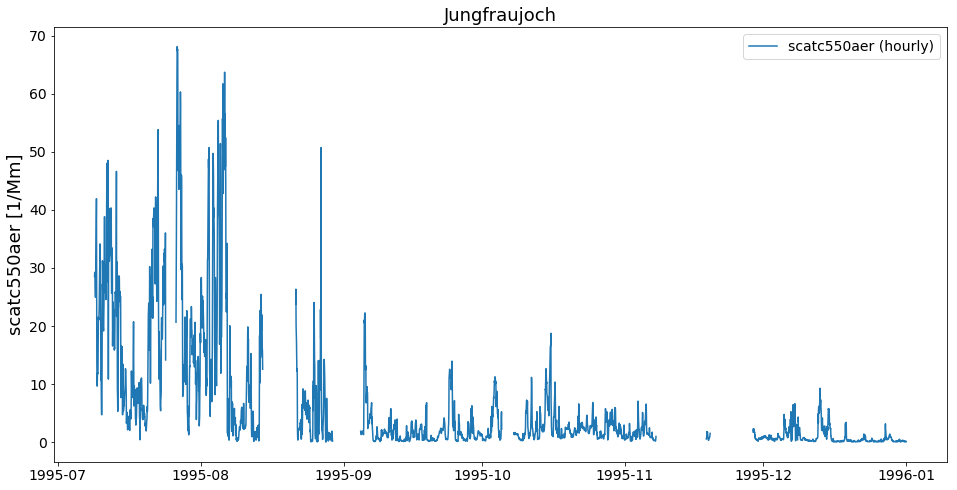

In [7]:
first_file.plot_timeseries('scatc550aer');

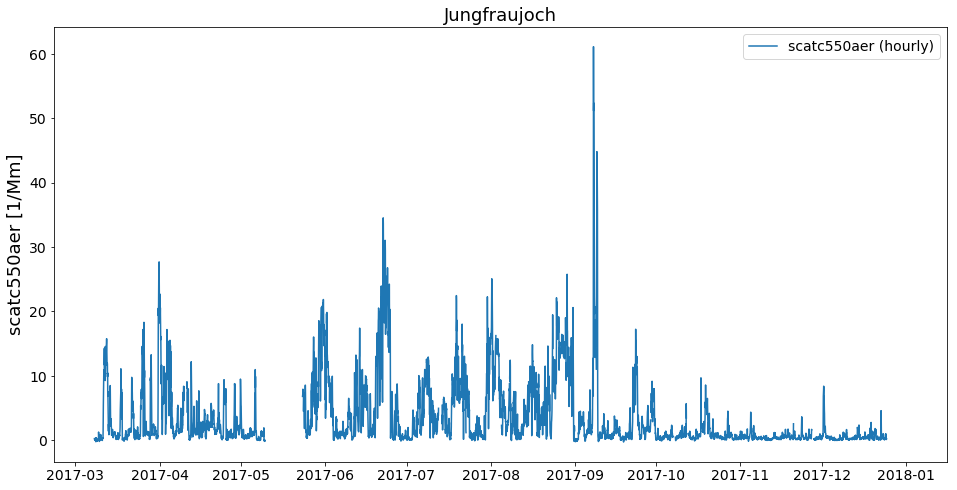

In [8]:
last_file.plot_timeseries('scatc550aer');

As you can see, the files contain data from different years. Now, how can we get these objects into one object that contains the timeseries of both files from this station?

This is actually very easy:

In [9]:
merged = first_file.merge_other(last_file, 'scatc550aer')
print(merged)


Pyaerocom StationData
---------------------
var_info (BrowseDict):
  scatc550aer (dict):
    name: aerosol_light_scattering_coefficient
    units: 1/Mm
    wavelength: 550.0 nm;525.0 nm
    method_ref: CH02L_scat_coef
    matrix: aerosol
    statistics: arithmetic mean
    overlap: False
    ts_type: hourly
station_coords (dict):
  latitude: 46.5475
  longitude: 7.985
  altitude: 3578.0
data_err (BrowseDict):
  scatc550aer (ndarray, 8760 items): [nan, nan, ..., nan, nan]
overlap (BrowseDict): <empty_dict>
filename: CH0001G.19950101000000.20181031145000.nephelometer..aerosol.1y.1h.CH02L_IN3563.CH02L_backscat_coef.lev2.nas; CH0001G.20170101000000.20190524143212.nephelometer..aerosol.1y.1h.CH02L_Ecotech_Aurora3000_JFJ_dry.CH02L_Neph_Aurora3000.lev2.nas
station_id: None
station_name: Jungfraujoch
instrument_name: IN3563; Ecotech_Aurora3000_JFJ_dry
PI: Baltensperger, Urs; Weingartner, Ernest; Bukowiecki, Nicolas
country: None
ts_type: hourly
latitude: 46.5475
longitude: 7.985
altitude: 357

As you can see in the output, the merging comprises not only the data arrays but also registers any differences in the assoicated metdadata (cf. e.g., sampling wavelength 550 nm vs. 525 nm, instrument name, PI)

Now, have a look at the merged timeseries data. 

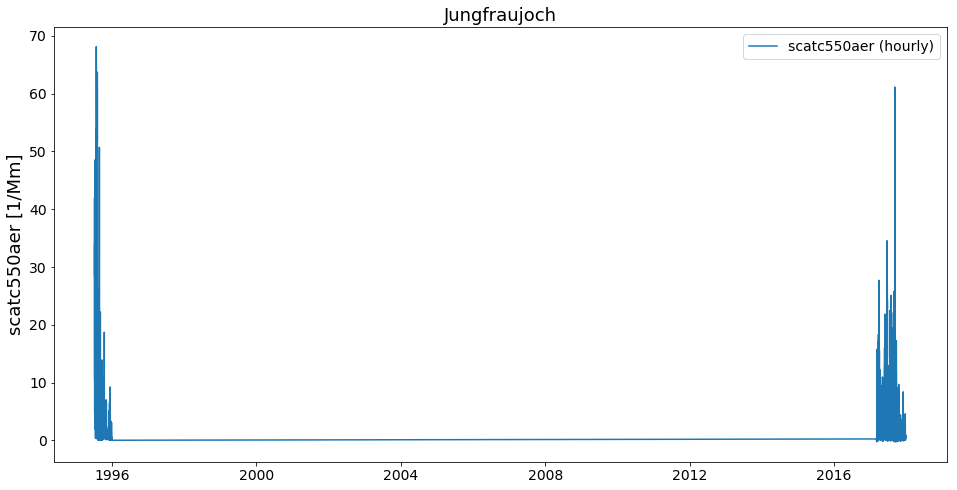

In [10]:
merged.plot_timeseries('scatc550aer');

Looks okay. Let's merge all 26 files and see if we get a nice long time series.

Retrieve list of `StationData` objects:

In [11]:
stats = data.to_station_data('Jungfraujoch', 'scatc550aer', merge_if_multi=False)
print('Number of StationData objects retrieved: {}'.format(len(stats)))

Number of StationData objects retrieved: 28


Now merge them into one long time series:

In [12]:
merged = pya.helpers.merge_station_data(stats, var_name='scatc550aer')
print(merged)


Pyaerocom StationData
---------------------
var_info (BrowseDict):
  scatc550aer (dict):
    name: aerosol_light_scattering_coefficient
    units: 1/Mm
    wavelength: 550.0 nm;525.0 nm
    statistics: arithmetic mean
    matrix: aerosol
    overlap: False
    ts_type: hourly
    method_ref: CH02L_scat_coef
station_coords (dict):
  latitude: 46.5475
  longitude: 7.985
  altitude: 3580.0
data_err (BrowseDict):
  scatc550aer (ndarray, 8760 items): [nan, nan, ..., nan, nan]
overlap (BrowseDict):
  scatc550aer: 2015-01-01 00:00:00    0.068376
2015-01-01 01:00:00    0.255198
2015-01-01 02:00:00   -0.284809
2015-01-01 03:00:00    0.123830
2015-01-01 04:00:00    0.127599
2015-01-01 05:00:00    0.052224
2015-01-01 06:00:00   -0.011306
2015-01-01 07:00:00    0.086143
2015-01-01 08:00:00   -0.088835
2015-01-01 09:00:00   -0.084528
2015-01-01 10:00:00    0.082912
2015-01-01 11:00:00    0.540007
2015-01-01 12:00:00    0.062992
2015-01-01 13:00:00    0.791436
2015-01-01 14:00:00    0.220202
2015-0

And plot...

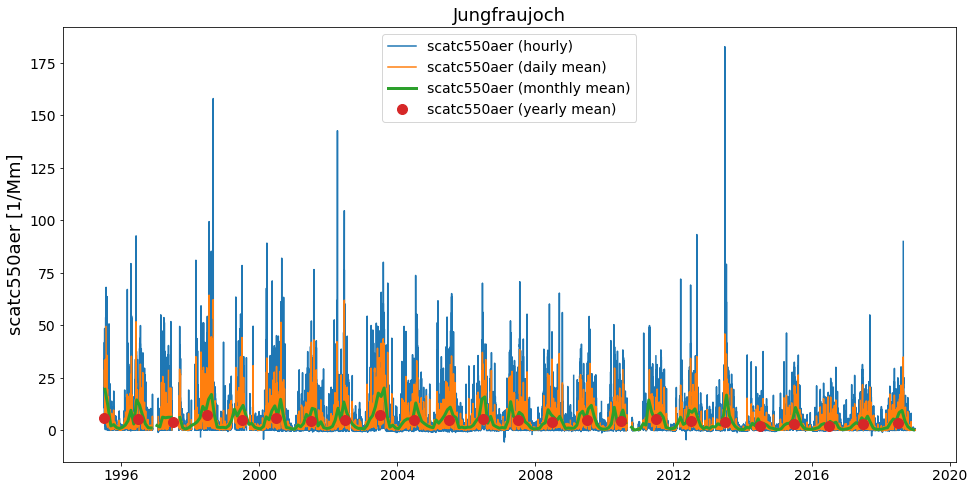

In [13]:
ax = merged.plot_timeseries('scatc550aer')
merged.plot_timeseries('scatc550aer', freq='daily', ax=ax)
merged.plot_timeseries('scatc550aer', freq='monthly', lw=3, ax=ax)
merged.plot_timeseries('scatc550aer', freq='yearly', ls='none', marker='o', ms=10, ax=ax);

#### Comment for convenience....

Actually, in the default setup you do not really need to think about all this. As you might have recognised, when creating the list of `StationData` objects from the `UngriddedData` object (using method `to_station_data`) we parsed the argument `merge_if_multi=False`.

The default here is `True`, so you can just go ahead and do:

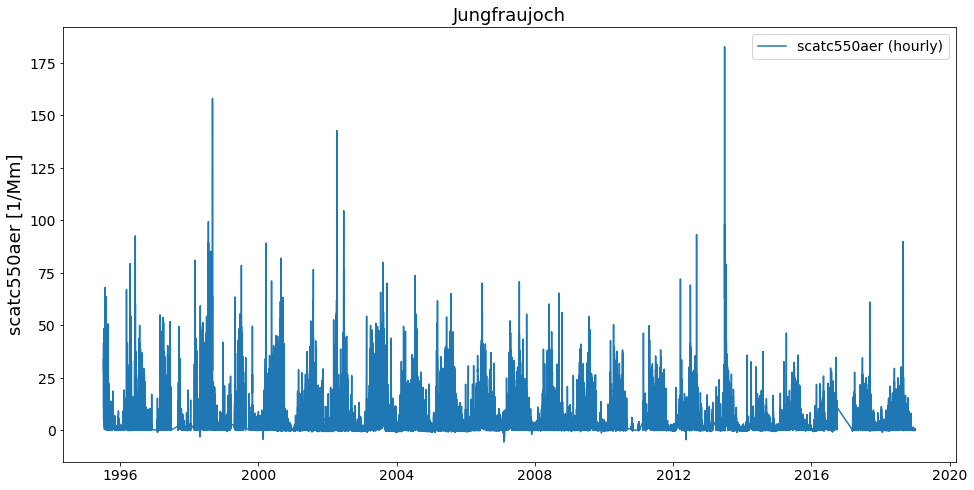

In [14]:
data.to_station_data('Jungfraujoch', 'scatc550aer').plot_timeseries('scatc550aer')

What's happening here is, that `to_station_data` internally creates a list of `StationData` objects and uses the above illustrated method `merge_station_data` at the end if the input argument `merge_if_multi=True`. 

#### What about overlapping data ??

In some situations, there may be overlapping conflicts when merging multiple time series into one long time-series. In the following, we illustrate how these overlaps are handled if they occur. 

The method `merge_station_data` that is illustrated above has some features to handle overlapping data and in any case, all overlaps that were detected are stored in the `overlap` attribute of the merged `StationData` object. Let's check first if there are any overlaps in the Jungfraujoch data:

In [15]:
merged.overlap

BrowseDict([('scatc550aer', 2015-01-01 00:00:00    0.068376
             2015-01-01 01:00:00    0.255198
             2015-01-01 02:00:00   -0.284809
             2015-01-01 03:00:00    0.123830
             2015-01-01 04:00:00    0.127599
             2015-01-01 05:00:00    0.052224
             2015-01-01 06:00:00   -0.011306
             2015-01-01 07:00:00    0.086143
             2015-01-01 08:00:00   -0.088835
             2015-01-01 09:00:00   -0.084528
             2015-01-01 10:00:00    0.082912
             2015-01-01 11:00:00    0.540007
             2015-01-01 12:00:00    0.062992
             2015-01-01 13:00:00    0.791436
             2015-01-01 14:00:00    0.220202
             2015-01-01 15:00:00   -0.008076
             2015-01-01 16:00:00    0.062992
             2015-01-01 17:00:00    0.386565
             2015-01-01 18:00:00    0.272965
             2015-01-01 19:00:00    0.078067
             2015-01-01 20:00:00    0.375259
             2015-01-01 21:00:00    0.05

Apparently, there is. You can check out these data (in comparison with the retrieved time series) as follows:

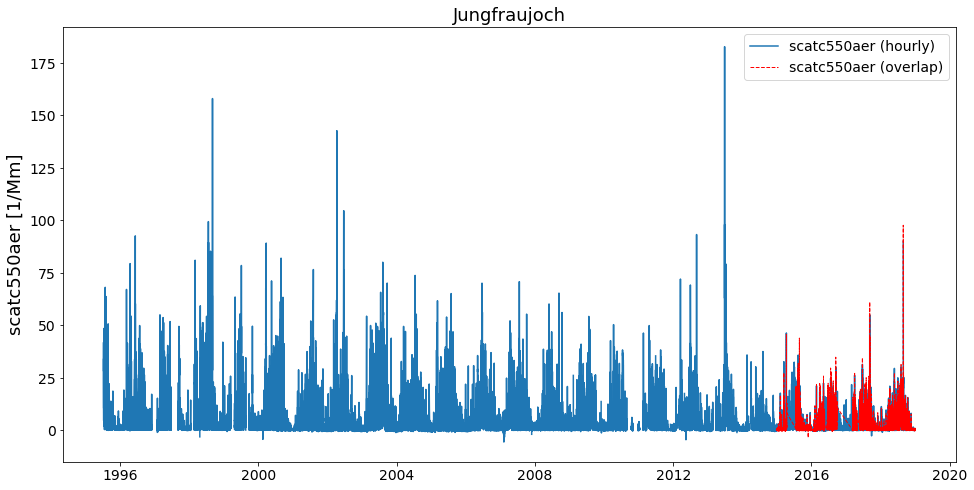

In [16]:
merged.plot_timeseries('scatc550aer', add_overlaps=True);

#### How to prioritise certain stations from others, when deciding what goes into overlap and what into the final timeseries?

The method `merge_station_data` provides a bunch of options to handle that. Things do not be written twice so please read the docstring of the method:

In [17]:
help(pya.helpers.merge_station_data)

Help on function merge_station_data in module pyaerocom.helpers:

merge_station_data(stats, var_name, pref_attr=None, sort_by_largest=True, fill_missing_nan=True, **add_meta_keys)
    Merge multiple StationData objects (from one station) into one instance
    
    Note
    ----
    - all input :class:`StationData` objects need to have same attributes       ``station_name``, ``latitude``, ``longitude`` and ``altitude``
    
    Parameters
    ----------
    stats : list
        list containing :class:`StationData` objects (note: all of these 
        objects must contain variable data for the specified input variable)
    var_name : str
        data variable name that is to be merged
    pref_attr 
        optional argument that may be used to specify a metadata attribute
        that is available in all input :class:`StationData` objects and that
        is used to order the input stations by relevance. The associated values
        of this attribute need to be sortable (e.g. revision_

In particular, `pref_attr` and `sort_by_largest` are relevant here. 

**NOTE**: if `pref_attr` is unspecified, then the stations are sorted based on the number of valid measurement points for the input variable. This was done in the merged time series that we retrieved above.

Now, in the following, let's not use the number of available data points (to sort the stations by relevance) but prefer stations that have a more recent data revision date.

In [18]:
try:
    merged_pref_awesomeness = pya.helpers.merge_station_data(stats, 'scatc550aer', pref_attr='awesomeness')
except pya.exceptions.MetaDataError as e:
    print('Failed merging, error: {}'.format(repr(e)))

Failed merging, error: MetaDataError('Cannot sort station relevance by attribute awesomeness. At least one of the input stations does not contain this attribute',)


Unfortunately, the `StationData` objects do not contain an attribute `awesomeness` by which we could sort. Let's go with 
`revision_date` instead:

In [19]:
# recompute stations, since we overwrote one above
stats = data.to_station_data('Jungfraujoch', 'scatc550aer', merge_if_multi=False)
merged_pref_recent_revision = pya.helpers.merge_station_data(stats, 'scatc550aer', pref_attr='revision_date')

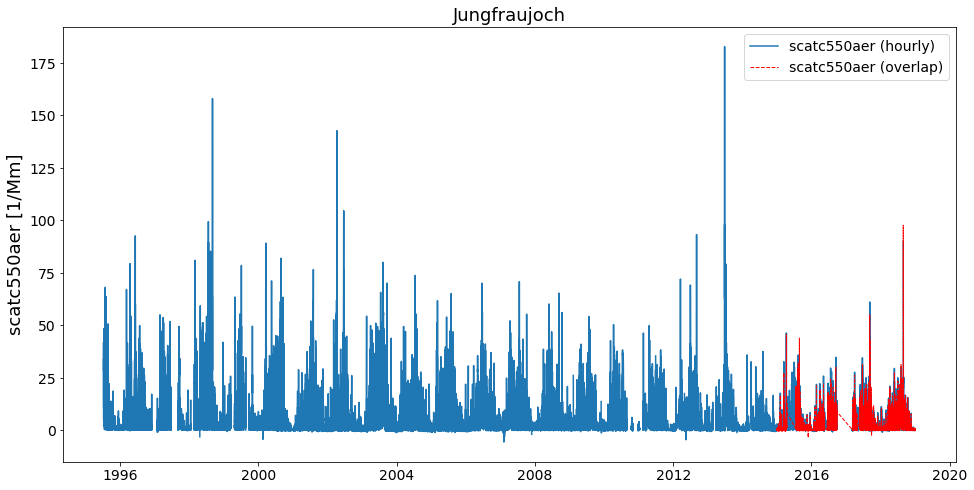

In [20]:
merged_pref_recent_revision.plot_timeseries('scatc550aer', add_overlaps=True)

Let's see if there is any difference to the previous method (resample to daily resolution):

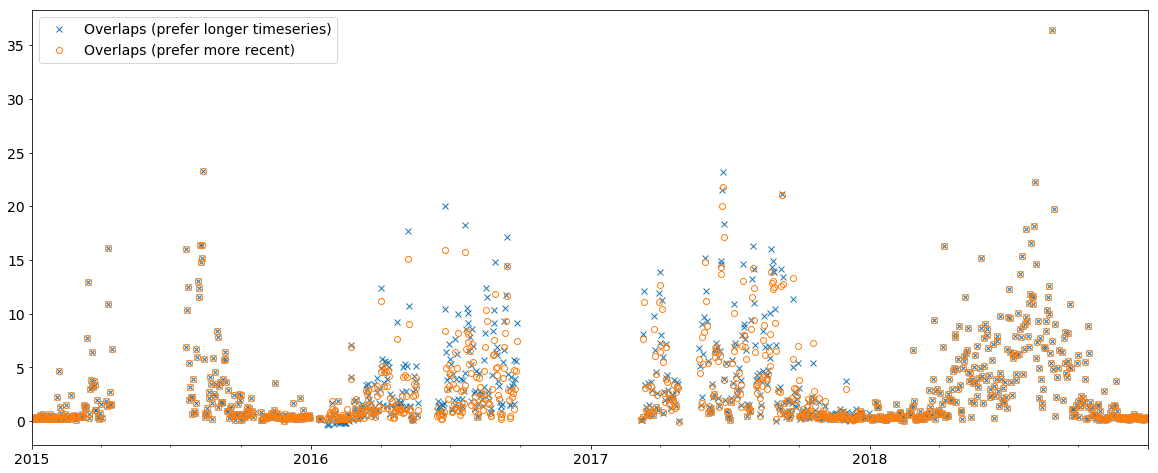

In [21]:
ax = merged.overlap['scatc550aer'].resample('D').mean().plot(style='x', label='Overlaps (prefer longer timeseries)',
                                                             figsize=(20, 8))

merged_pref_recent_revision.overlap['scatc550aer'].resample('D').mean().plot(style='o', 
                                                                             label='Overlaps (prefer more recent)',
                                                                             ax=ax, markerfacecolor='none')
ax.legend();

As you can see, the merging strategy can make an impact and it is important to define a reasonable strategy. In this case, it is certainly more reliable to use the data with the more recent revision date.

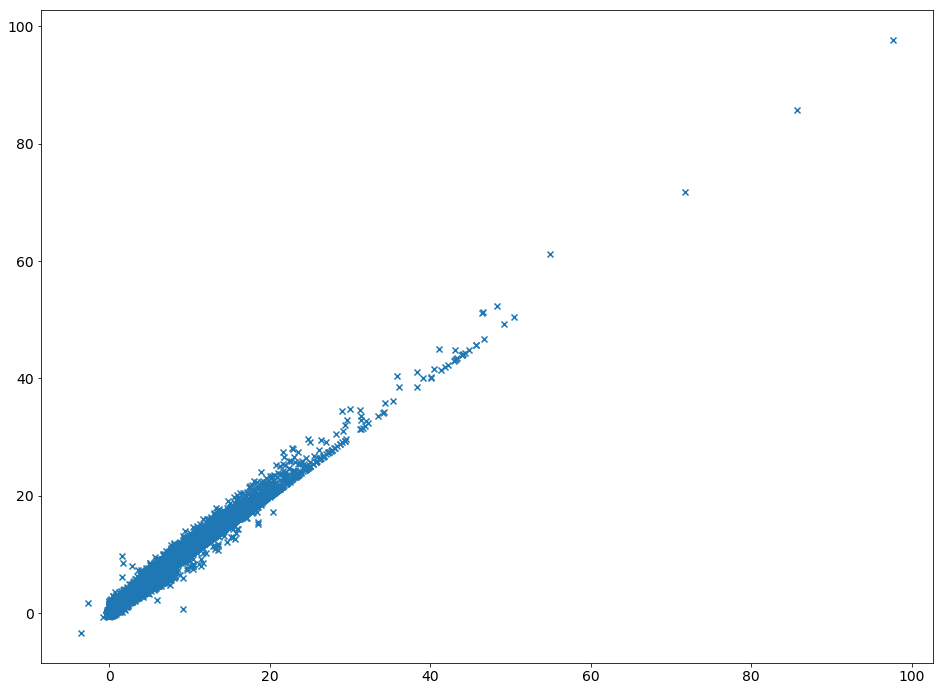

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
ax = plt.scatter(merged_pref_recent_revision.overlap['scatc550aer'], 
                 merged.overlap['scatc550aer'], marker='x')